### WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

In [2]:
# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
csv_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
g_url = 'https://maps.googleapis.com/maps/api/geocode/json?address=' + g_key

setting = {'units':'Imperial','appid':weather_api_key}
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']

In [3]:

weather_df = pd.read_csv(csv_file, encoding="ISO-8859-1")
weather_df.head()

,City,Date_Updated,Country,Latitude,Longitude,Temperature_Max,Humidity,Cloudiness,Wind_Speed
0,taian,2020-05-26,CN,36.19,117.12,73.0,51,20,4.09
1,guiyang,2020-05-26,CN,26.58,106.72,60.8,82,90,8.95
2,kapaa,2020-05-26,US,22.08,-159.32,84.0,78,1,6.93
3,mataura,2020-05-26,NZ,-46.19,168.86,43.9,85,40,1.32
4,mount gambier,2020-05-26,AU,-37.83,140.77,50.0,71,59,10.29


### Generate Cities List

In [4]:
# variable to hold lat_long and cities
lat_lngs = []
cities = []

# random lats and lngs combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# view nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # append any city found that is not in cities list 
    if city not in cities:
        cities.append(city)

# Print number of cities found
len(cities)

582

In [5]:
#Create dataframe for storering cities info.
city_weather_df = pd.DataFrame(cities, columns =['City'])

# create columns for required data
city_weather_df['Date_Updated'] = ""
city_weather_df['Country'] = ""
city_weather_df['Latitude'] = ""
city_weather_df['Longitude'] = ""
city_weather_df['Temperature_Max'] = ""
city_weather_df['Humidity'] = ""
city_weather_df['Cloudiness'] = ""
city_weather_df['Wind_Speed'] = ""

# show city table
city_weather_df.head()

,City,Date_Updated,Country,Latitude,Longitude,Temperature_Max,Humidity,Cloudiness,Wind_Speed
0,mys shmidta,,,,,,,,
1,rikitea,,,,,,,,
2,chuy,,,,,,,,
3,ushuaia,,,,,,,,
4,cabo san lucas,,,,,,,,


### Perform API Calls

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | wajid
http://api.openweathermap.org/data/2.5/weather?weather?q=wajid&units=imperial&APPID=410593b02c3edf7575ec93bc0bb7cfaf
name 'get_current' is not defined
Processing Record 2 of Set 0 | mezen
http://api.openweathermap.org/data/2.5/weather?weather?q=mezen&units=imperial&APPID=410593b02c3edf7575ec93bc0bb7cfaf
name 'get_current' is not defined
Processing Record 3 of Set 0 | saleaula
http://api.openweathermap.org/data/2.5/weather?weather?q=saleaula&units=imperial&APPID=410593b02c3edf7575ec93bc0bb7cfaf
name 'get_current' is not defined
Processing Record 4 of Set 0 | hilo
http://api.openweathermap.org/data/2.5/weather?weather?q=hilo&units=imperial&APPID=410593b02c3edf7575ec93bc0bb7cfaf
name 'get_current' is not defined
Processing Record 5 of Set 0 | castro
http://api.openweathermap.org/data/2.5/weather?weather?q=castro&units=imperial&APPID=410593b02c3edf7575ec93bc0bb7cfaf
name 'get_current' is not defined
Pr

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
row_count = 0
count_city = len(city_weather_df.index)

print("Beginning Data Retrieval")
print("-----------------------------")

for index,row in city_weather_df.iterrows():
    row_count = row_count + 1
    city_name = city_weather_df.loc[index, 'City']
    print(f"Processing Record {row_count} of {count_city} | {city_name}")
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city_name}"
    response = requests.get(query_url).json()
    try:
        city_weather_df.loc[index, 'Date_Updated'] = datetime.date(datetime.now())
        city_weather_df.loc[index, 'Country'] = response['sys']['country']
        city_weather_df.loc[index, 'Latitude'] = response['coord']['lat']
        city_weather_df.loc[index, 'Longitude']  = response['coord']['lon']
        city_weather_df.loc[index, 'Temperature_Max']  = response['main']['temp_max']
        city_weather_df.loc[index, 'Humidity']  = response['main']['humidity']
        city_weather_df.loc[index, 'Cloudiness']  = response['clouds']['all']
        city_weather_df.loc[index, 'Wind_Speed']  = response['wind']['speed']
    except:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 582 | mys shmidta
City not found. Skipping...
Processing Record 2 of 582 | rikitea
Processing Record 3 of 582 | chuy
Processing Record 4 of 582 | ushuaia
Processing Record 5 of 582 | cabo san lucas
Processing Record 6 of 582 | shimoda
Processing Record 7 of 582 | ilulissat
Processing Record 8 of 582 | vaini
Processing Record 9 of 582 | mataura
Processing Record 10 of 582 | atuona
Processing Record 11 of 582 | mgandu
Processing Record 12 of 582 | belushya guba
City not found. Skipping...
Processing Record 13 of 582 | portland
Processing Record 14 of 582 | sao francisco
Processing Record 15 of 582 | kungsbacka
Processing Record 16 of 582 | krasnoyarsk-66
City not found. Skipping...
Processing Record 17 of 582 | lubango
Processing Record 18 of 582 | yellowknife
Processing Record 19 of 582 | samana
Processing Record 20 of 582 | vardo
Processing Record 21 of 582 | saint-philippe
Processing Record 22 of 582 | choku

Processing Record 196 of 582 | carnarvon
Processing Record 197 of 582 | mayo
Processing Record 198 of 582 | veraval
Processing Record 199 of 582 | narsaq
Processing Record 200 of 582 | kambove
Processing Record 201 of 582 | taywarah
Processing Record 202 of 582 | vadso
Processing Record 203 of 582 | muros
Processing Record 204 of 582 | tessalit
Processing Record 205 of 582 | saleaula
City not found. Skipping...
Processing Record 206 of 582 | tokur
Processing Record 207 of 582 | hue
Processing Record 208 of 582 | cam ranh
Processing Record 209 of 582 | oranjemund
Processing Record 210 of 582 | ust-kamchatsk
City not found. Skipping...
Processing Record 211 of 582 | san pedro del parana
Processing Record 212 of 582 | hamilton
Processing Record 213 of 582 | kavieng
Processing Record 214 of 582 | riberalta
Processing Record 215 of 582 | tura
Processing Record 216 of 582 | aromashevo
Processing Record 217 of 582 | wamba
Processing Record 218 of 582 | bilibino
Processing Record 219 of 582 | 

Processing Record 388 of 582 | mirnyy
Processing Record 389 of 582 | iquique
Processing Record 390 of 582 | yinchuan
Processing Record 391 of 582 | el cope
Processing Record 392 of 582 | el prat de llobregat
Processing Record 393 of 582 | lumeje
Processing Record 394 of 582 | ugoofaaru
Processing Record 395 of 582 | praia da vitoria
Processing Record 396 of 582 | sur
Processing Record 397 of 582 | flin flon
Processing Record 398 of 582 | clyde river
Processing Record 399 of 582 | gonbad-e qabus
Processing Record 400 of 582 | lolua
City not found. Skipping...
Processing Record 401 of 582 | hailar
Processing Record 402 of 582 | litoral del san juan
City not found. Skipping...
Processing Record 403 of 582 | san juan
Processing Record 404 of 582 | beringovskiy
Processing Record 405 of 582 | nouakchott
Processing Record 406 of 582 | ayr
Processing Record 407 of 582 | campbell river
Processing Record 408 of 582 | ozgon
City not found. Skipping...
Processing Record 409 of 582 | cheuskiny
City

Processing Record 580 of 582 | boddam
Processing Record 581 of 582 | russellville
Processing Record 582 of 582 | arkhara
-----------------------------
Data Retrieval Complete
-----------------------------


49 cities were droped due to non-reponse from open weather.


### Plotting the Data 

#### Latitude vs. Temperature Plot

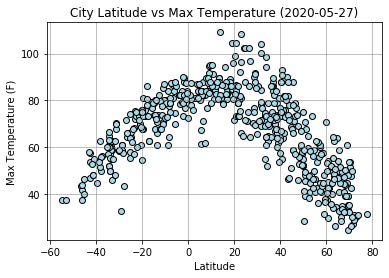

In [9]:
#create plot chart for lat vs. temp with title, y and x axes labels.
date_label = datetime.date(datetime.now())
plt.title("City Latitude vs Max Temperature (" + str(date_label) +")", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Max Temperature (F)", fontsize=10)
plt.grid(color='gray', linestyle='-', linewidth=.5)

plt.scatter(city_weather_df["Latitude"],city_weather_df["Temperature_Max"], color='lightblue',edgecolor='black')
#export the plotted images as .pngs.
chart_output = "output_data/Lat_Temp_" + str(date_label) + ".png"
plt.savefig(chart_output)
plt.show()  

#### Latitude vs. Humidity Plot

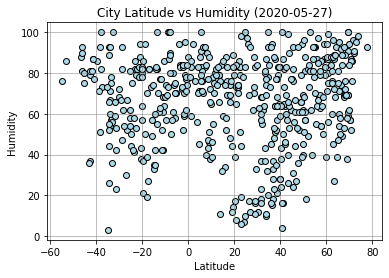

In [10]:
# create plot chart for lat vs. humidity with title, y and x axes labels
plt.title("City Latitude vs Humidity (" + str(date_label) +")", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Humidity", fontsize=10)
plt.grid(color='gray', linestyle='-', linewidth=.5)

plt.scatter(city_weather_df["Latitude"],city_weather_df["Humidity"], color='lightblue',edgecolor='black')
chart_output = "output_data/Lat_Humidity_" + str(date_label) + ".png"
plt.savefig(chart_output)
plt.show()

#### Latitude vs. Cloudiness Plot

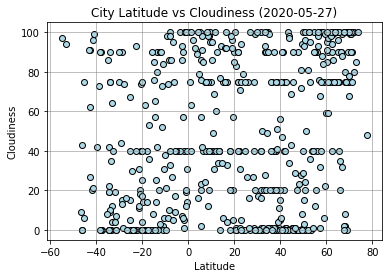

In [11]:
# # create plot chart for lat vs. cloudiness with title, y and x axes labels
plt.title("City Latitude vs Cloudiness (" + str(date_label) +")", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Cloudiness", fontsize=10)
plt.grid(color='gray', linestyle='-', linewidth=.5)

plt.scatter(city_weather_df["Latitude"],city_weather_df["Cloudiness"], color='lightblue',edgecolor='black')
chart_output = "output_data/Lat_Cloud_" + str(date_label) + ".png"
plt.savefig(chart_output)
plt.show()

#### Latitude vs. Wind Speed Plot

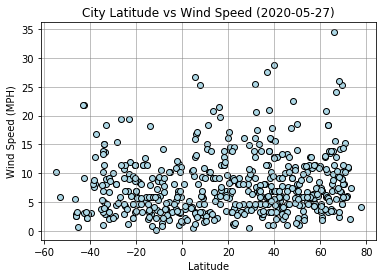

In [12]:
# create plot chart for lat vs. wind speed with title, y and x axes labels
plt.title("City Latitude vs Wind Speed (" + str(date_label) +")", fontsize=12)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Wind Speed (MPH)", fontsize=10)
plt.grid(color='gray', linestyle='-', linewidth=.5)

plt.scatter(city_weather_df["Latitude"],city_weather_df["Wind_Speed"], color='lightblue',edgecolor='black')
chart_output = "output_data/Lat_Wind_" + str(date_label) + ".png"
plt.savefig(chart_output)
plt.show()